<ul><li style="font-size: 30px; font-weight: bold">Importing Needed Librarys </li></ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

<ul><li style="font-size: 25px; font-weight: bold">Data Preprocessing </li></ul>

In [62]:
import os
import shutil

In [133]:
os.chdir("/Users/Arbaz Khan/Desktop/TechAIntern/train")

In [134]:
prev_file = None
for file in os.listdir():
    
    file_name = file.split(" ")
    if not os.path.exists(file_name[0]):
        os.mkdir(file_name[0])
        prev_file = file_name[0]
    
    if prev_file == file_name[0]:
        shutil.move(file, prev_file)
    else:
        prev_file = file_name[0]

In [140]:
os.chdir("/Users/Arbaz Khan/Desktop/TechAIntern/test")

In [141]:
prev_file = None
for file in os.listdir():
    
    file_name = file.split(" ")
    if not os.path.exists(file_name[0]):
        os.mkdir(file_name[0])
        prev_file = file_name[0]
    
    if prev_file == file_name[0]:
        shutil.move(file, prev_file)
    else:
        prev_file = file_name[0]

In [142]:
os.chdir("/Users/Arbaz Khan/Desktop/TechAIntern")

<ul><li style="font-size: 25px; font-weight: bold">Adding The Training Set</li></ul>

In [143]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 67692 files belonging to 67 classes.


<ul><li style="font-size: 25px; font-weight: bold">Adding The Testing Set And Validation Set</li></ul>

In [144]:
testing_set, validation_set = tf.keras.utils.image_dataset_from_directory(
    "test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=1,
    validation_split=0.5,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 22688 files belonging to 67 classes.
Using 11344 files for training.
Using 11344 files for validation.


In [145]:
testing_set, validation_set

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 67), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 67), dtype=tf.float32, name=None))>)

<ul><li style="font-size: 25px; font-weight: bold">Building The Model</li></ul>

In [179]:
cnn = tf.keras.models.Sequential()
# [
#     tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(64, 64, 3)),
#     tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
#     tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=128, activation="relu"),
#     tf.keras.layers.Dense(units=67, activation="softmax")
# ]

<h3> Process of CNN: </h3>
<ol>
    <li>Filter: It scan the important feature of the image an then do some computation, after that it stres that features into another matrics</li>
    <li>Pooling: There is a two type of pooling:-
        1). Max Pooling: It scan the entire matrix by taking 2X2 matrix and then take the MAX value from it and then stroe that result into another matrix.
        2). Average Pooling: It also scan the entire matrix by taking 2X2 matrix, but it takes the averge of thet 2X2 matrix an then stores the result into another matrix</li>
    <li>Fully Connected: It convert the 2X2 matrix into a flattern matrix ehre each input is connected to all neurons for further Neural Network Processing</li>
</ol>

<h3> Building Convolution Layer: </h3>

In [180]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(64, 64, 3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # It means scan max 2X2 matrix

In [181]:
# Repeating the above step again for getting the important feature by reducing the size
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 

In [182]:
# It helps in avoiding the overfitting situation
cnn.add(tf.keras.layers.Dropout(0.5))

In [183]:
# To flatten the matrix
cnn.add(tf.keras.layers.Flatten())

In [184]:
# Adding Dense Layers
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))
cnn.add(tf.keras.layers.Dense(units=67, activation="softmax"))

<h3> Compiling And Training</h3>

In [185]:
cnn.compile(
    optimizer="rmsprop",
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [186]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
2116/2116 [==============================] - 1272s 600ms/step - loss: 1.4435 - accuracy: 0.7764 - val_loss: 1.7762 - val_accuracy: 0.8136
Epoch 2/5
2116/2116 [==============================] - 1155s 545ms/step - loss: 0.3997 - accuracy: 0.9519 - val_loss: 1.4207 - val_accuracy: 0.9127
Epoch 3/5
2116/2116 [==============================] - 1157s 547ms/step - loss: 0.4804 - accuracy: 0.9693 - val_loss: 2.3027 - val_accuracy: 0.9338
Epoch 4/5
2116/2116 [==============================] - 1186s 560ms/step - loss: 0.6110 - accuracy: 0.9760 - val_loss: 3.7248 - val_accuracy: 0.9343
Epoch 5/5
2116/2116 [==============================] - 1198s 566ms/step - loss: 0.7083 - accuracy: 0.9801 - val_loss: 6.5945 - val_accuracy: 0.9268


<ul><li style="font-size: 25px; font-weight: bold">Saving The Model And Training History</li></ul>

In [188]:
cnn.save("trained_model.h5")

C:\Users\Arbaz Khan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [190]:
training_history.history

{'loss': [1.4435480833053589,
  0.39967426657676697,
  0.4803834855556488,
  0.6110328435897827,
  0.7082991600036621],
 'accuracy': [0.7764137387275696,
  0.95194411277771,
  0.9692873358726501,
  0.9760237336158752,
  0.9800862669944763],
 'val_loss': [1.7761578559875488,
  1.420690655708313,
  2.3026552200317383,
  3.724759101867676,
  6.594460964202881],
 'val_accuracy': [0.8136459589004517,
  0.9127292037010193,
  0.9337975978851318,
  0.9343265295028687,
  0.9268335700035095]}

In [195]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [191]:
# Recording History In Json Formate
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

<h3> Calculating Accuracy Of Model Achieved on Validation set </h3>

In [203]:
print("Validation Set Accuracy = {} %".format(training_history.history["val_accuracy"][-1]*100))

Validation Set Accuracy = 92.68335700035095 %


<ul><li style="font-size: 25px; font-weight: bold">Accuracy Visualisation</li></ul>

<h3>Training Accuracy Visualization</h3>

In [206]:
epochs = [i for i in range(1, 6)]

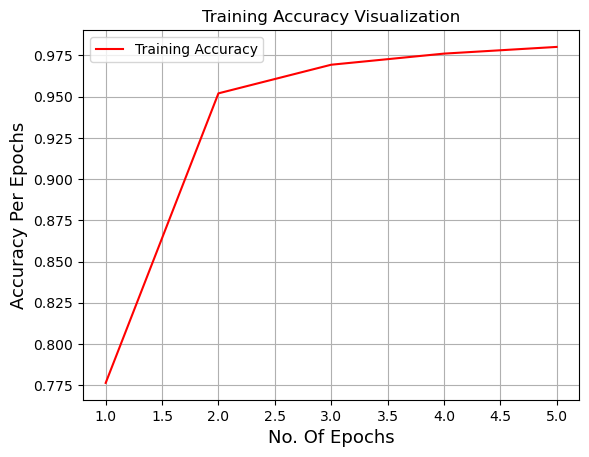

In [225]:
plt.plot(epochs, training_history.history["accuracy"], color="red", label="Training Accuracy")
plt.xlabel("No. Of Epochs", size=13)
plt.ylabel("Accuracy Per Epochs", size=13)
plt.title("Training Accuracy Visualization")
plt.grid()
plt.legend()

<h3>Validation Accuracy Visualization</h3>

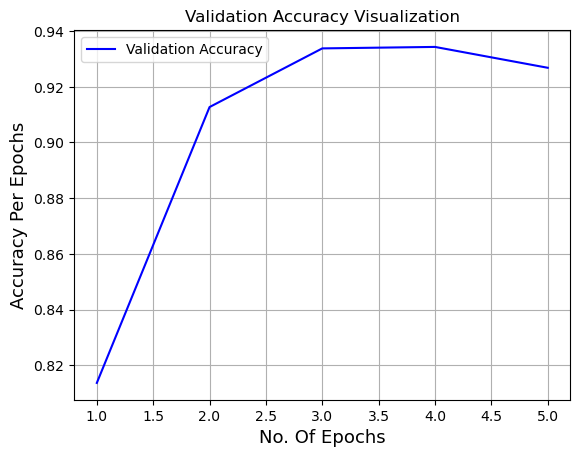

In [227]:
plt.plot(epochs, training_history.history["val_accuracy"], color="blue", label="Validation Accuracy")
plt.xlabel("No. Of Epochs", size=13)
plt.ylabel("Accuracy Per Epochs", size=13)
plt.title("Validation Accuracy Visualization")
plt.grid()
plt.legend()